# 03: Supervised Learning - Baseline Models

## Overview
This notebook covers fundamental supervised learning algorithms for both classification and regression tasks.

## Topics Covered:
1. Linear Regression
2. Logistic Regression
3. Decision Trees
4. K-Nearest Neighbors (KNN)
5. Naive Bayes
6. Support Vector Machines (SVM)
7. Model Evaluation Metrics

## Focus Points:
- Understanding of algorithm assumptions
- When to use each algorithm
- Bias-variance tradeoff
- Evaluation metrics interpretation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully")

Libraries imported successfully


## 1. Linear Regression

Linear Regression Results:
Coefficient: 44.24
Intercept: 0.10
R² Score: 0.9374
RMSE: 10.2079
MAE: 8.4167


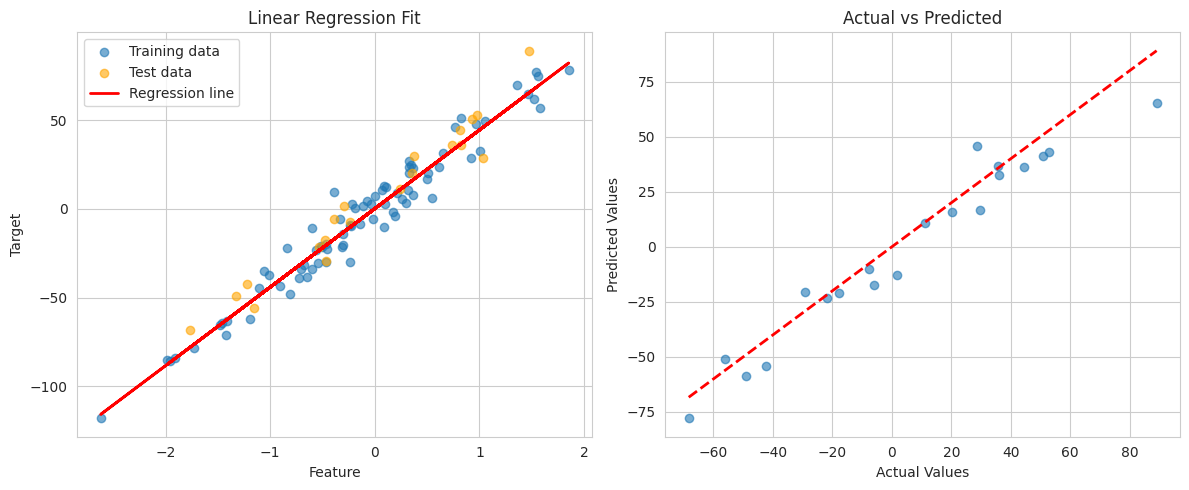

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression Results:")
print(f"Coefficient: {lr.coef_[0]:.2f}")
print(f"Intercept: {lr.intercept_:.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Training data')
plt.scatter(X_test, y_test, alpha=0.6, color='orange', label='Test data')
plt.plot(X, lr.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

plt.tight_layout()
plt.show()

## 2. Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic classification data
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.8800
Precision: 0.8776
Recall: 0.8776
F1-Score: 0.8776

Confusion Matrix:
[[45  6]
 [ 6 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.88      0.88      0.88        49

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



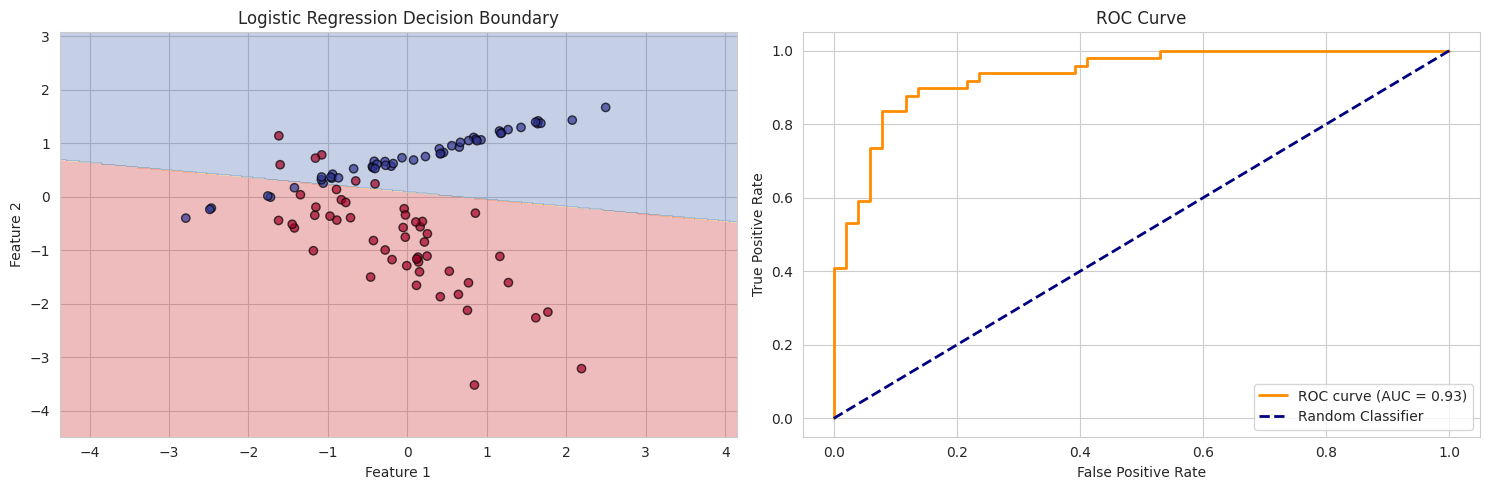

In [4]:
# Visualize decision boundary and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
axes[0].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, 
               cmap='RdYlBu', edgecolors='black', alpha=0.7)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Logistic Regression Decision Boundary')

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
            label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

plt.tight_layout()
plt.show()

## 3. Decision Trees

Decision Tree Results:
Accuracy: 0.9500
F1-Score: 0.9505

Feature Importances: [0.19153097 0.80846903]


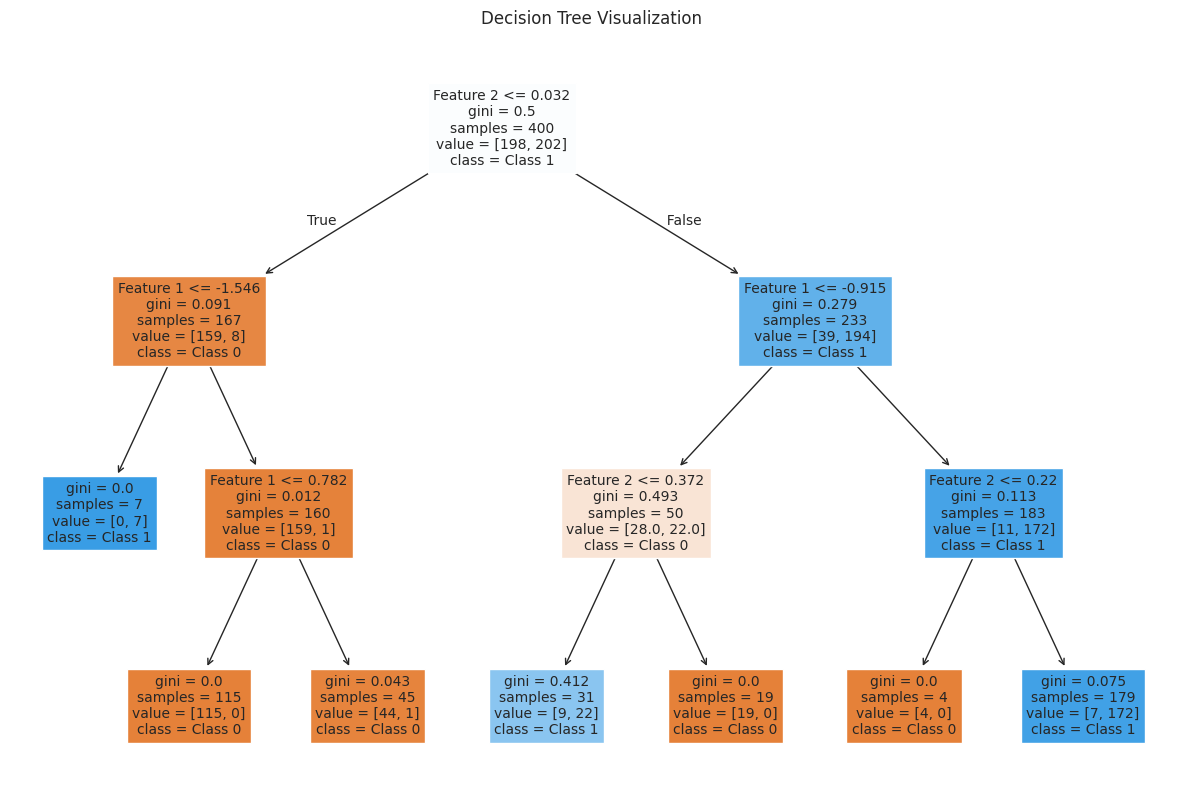

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")

# Feature importance
print(f"\nFeature Importances: {dt.feature_importances_}")

# Visualize tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=['Feature 1', 'Feature 2'], 
         class_names=['Class 0', 'Class 1'], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

## 4. K-Nearest Neighbors (KNN)

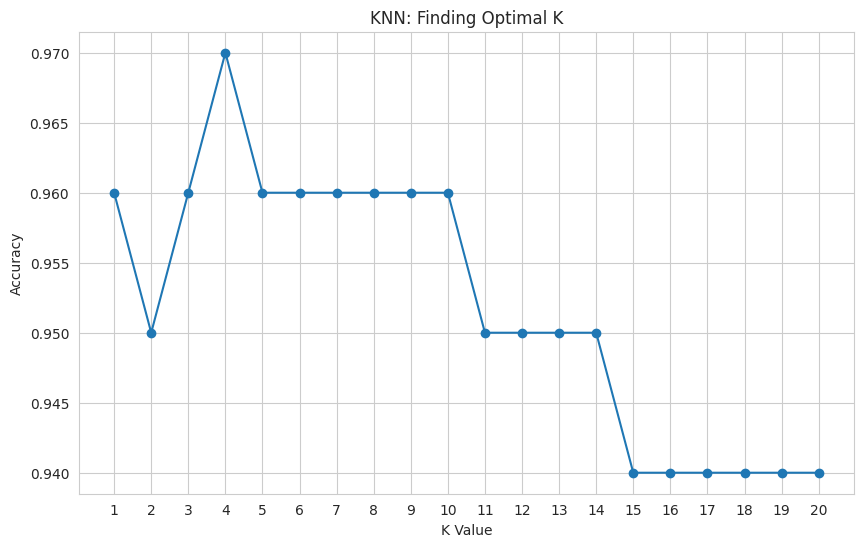

Optimal K: 4

KNN Results (K=4):
Accuracy: 0.9700
F1-Score: 0.9697


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Find optimal K
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Finding Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Train with optimal K
optimal_k = k_range[np.argmax(scores)]
print(f"Optimal K: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print(f"\nKNN Results (K={optimal_k}):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")

## 5. Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)

print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
Accuracy: 0.8800
F1-Score: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        51
           1       0.86      0.90      0.88        49

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



## 6. Support Vector Machines (SVM)

SVM Results with Different Kernels:

LINEAR Kernel:
  Accuracy: 0.9100
  F1-Score: 0.9143

RBF Kernel:
  Accuracy: 0.9200
  F1-Score: 0.9245

POLY Kernel:
  Accuracy: 0.7800
  F1-Score: 0.8000


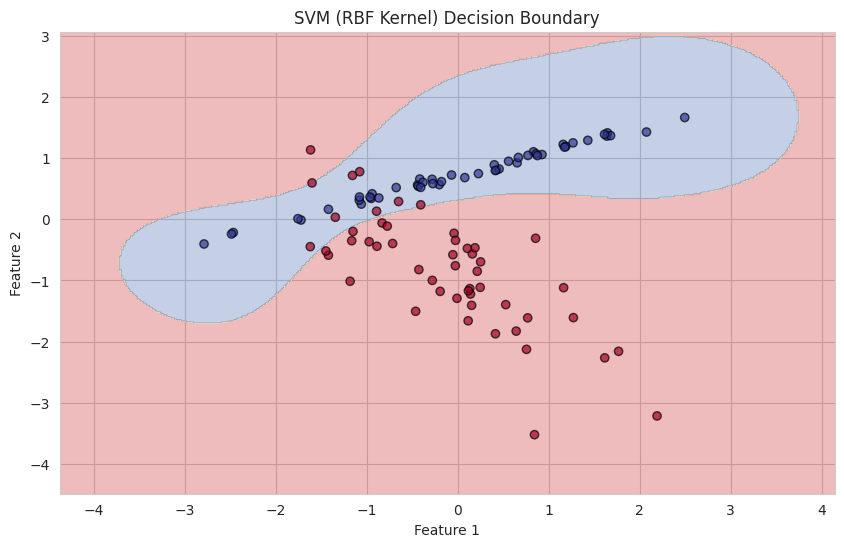

In [8]:
from sklearn.svm import SVC

# Train SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
svm_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    svm_results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred_svm),
        'f1': f1_score(y_test, y_pred_svm)
    }

# Display results
print("SVM Results with Different Kernels:")
for kernel, metrics in svm_results.items():
    print(f"\n{kernel.upper()} Kernel:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1-Score: {metrics['f1']:.4f}")

# Visualize SVM decision boundary (RBF kernel)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, 
           cmap='RdYlBu', edgecolors='black', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM (RBF Kernel) Decision Boundary')
plt.show()

## 7. Model Comparison


Model Comparison:
              Model  Accuracy  Precision   Recall  F1-Score  CV Mean   CV Std
Logistic Regression      0.88   0.877551 0.877551  0.877551   0.8750 0.039528
      Decision Tree      0.95   0.923077 0.979592  0.950495   0.9475 0.026693
                KNN      0.97   0.960000 0.979592  0.969697   0.9525 0.034821
        Naive Bayes      0.88   0.862745 0.897959  0.880000   0.8700 0.051599
          SVM (RBF)      0.92   0.859649 1.000000  0.924528   0.9275 0.034821


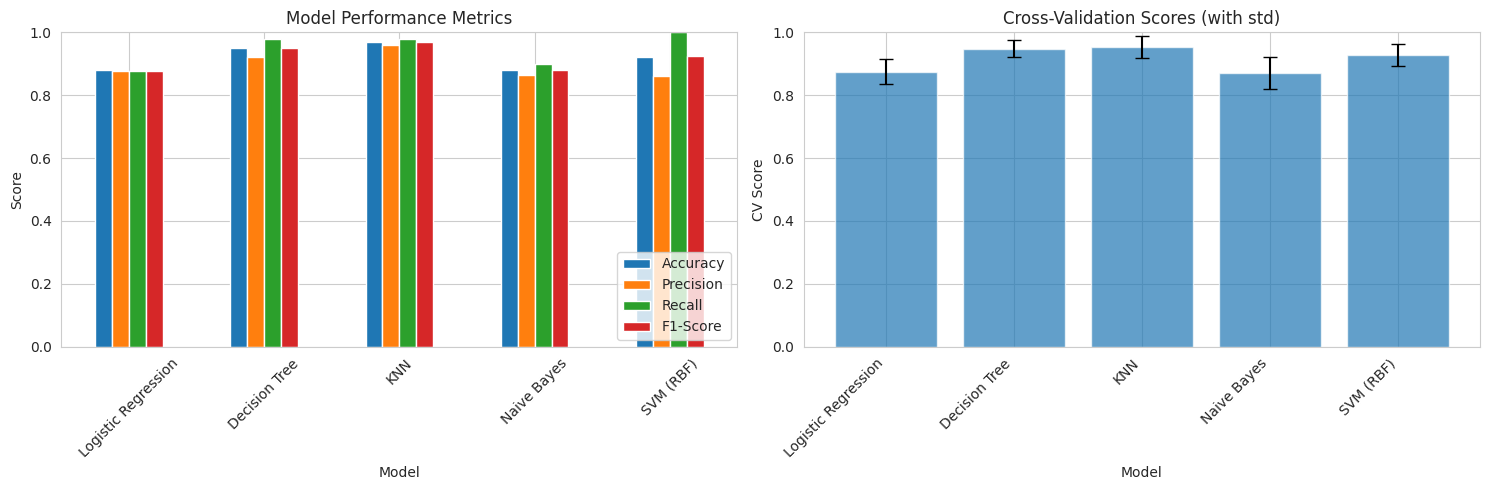

In [9]:
# Compare all models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=optimal_k),
    'Naive Bayes': GaussianNB(),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

# Create DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
               kind='bar', ax=axes[0], rot=45)
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Metrics')
axes[0].legend(loc='lower right')
axes[0].set_ylim([0, 1])

# Cross-validation comparison
axes[1].bar(results_df['Model'], results_df['CV Mean'], 
           yerr=results_df['CV Std'], capsize=5, alpha=0.7)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('CV Score')
axes[1].set_title('Cross-Validation Scores (with std)')
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## Questions & Answers

### Q1: What assumptions does Linear Regression make?
**Answer:**
1. **Linearity**: Linear relationship between features and target
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of errors
4. **Normality**: Errors are normally distributed
5. **No multicollinearity**: Features are not highly correlated

### Q2: When to use Logistic Regression vs Decision Trees?
**Answer:**
- **Logistic Regression**: When relationship is linear, need probability estimates, interpretability is important
- **Decision Trees**: When relationships are non-linear, feature interactions are important, interpretability with complex patterns

### Q3: What is the bias-variance tradeoff?
**Answer:**
- **Bias**: Error from wrong assumptions (underfitting)
- **Variance**: Error from sensitivity to training data (overfitting)
- Goal: Balance both to minimize total error
- Simple models: High bias, low variance
- Complex models: Low bias, high variance

### Q4: Why normalize/standardize features for KNN and SVM?
**Answer:** These algorithms use distance metrics. Features with larger scales dominate the distance calculation, leading to biased predictions. Normalization ensures all features contribute equally.

### Q5: What's the difference between precision and recall?
**Answer:**
- **Precision**: Of predicted positives, how many are actually positive? (TP / (TP + FP))
- **Recall**: Of actual positives, how many did we predict? (TP / (TP + FN))
- Use precision when false positives are costly
- Use recall when false negatives are costly

### Q6: What is overfitting and how to prevent it?
**Answer:**
- **Overfitting**: Model learns training data too well, including noise
- **Prevention**:
  - Cross-validation
  - Regularization (L1, L2)
  - Pruning (decision trees)
  - More training data
  - Simpler models
  - Early stopping

### Q7: Explain ROC curve and AUC
**Answer:**
- **ROC**: Plots True Positive Rate vs False Positive Rate at various thresholds
- **AUC**: Area Under the ROC Curve (0 to 1)
  - AUC = 1: Perfect classifier
  - AUC = 0.5: Random classifier
  - Higher AUC = Better model

## 📺 Explanation

Watch the complete explanation here:
[Supervised Model Explaination](https://youtu.be/HV1bxmQPuWk)
